## Monte Carlo - Euler Discretization

Download the data for Microsoft (‘MSFT’) from Yahoo Finance for the period ‘2000-1-1’ until today.

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
ticker = 'MSFT'  
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker, data_source='yahoo', start='2000-1-1')['Adj Close']

In [3]:
log_returns = np.log(1 + data.pct_change())

In [4]:
log_returns.tail()

,MSFT
Date,
2017-05-08,-0.000870
2017-05-09,0.001449
2017-05-10,0.003903
2017-05-11,-0.012340
2017-05-12,-0.001169


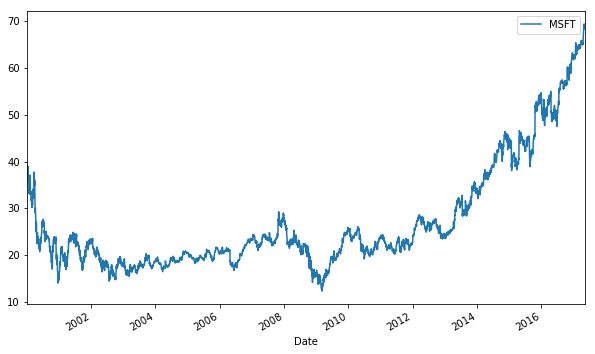

In [5]:
data.plot(figsize=(10, 6));

Store the annual standard deviation of the log returns in a variable, called “stdev”.

In [6]:
stdev = log_returns.std() * 250 ** 0.5
stdev

MSFT    0.309703
dtype: float64

To transform the object into an array, reassign stdev.values to stdev.

In [7]:
type(stdev)

pandas.core.series.Series

In [8]:
stdev = stdev.values
stdev

array([ 0.30970284])

#### Set the risk free rate, r, equal to 2.5% (0.025).

In [9]:
r = 0.025

#### Set the time horizon, T, equal to 1 year, the number of time intervals equal to 250, the iterations equal to 10,000. Create a variable, delta_t, equal to the quotient of T divided by the number of time intervals.

In [10]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals  
iterations = 10000  

#### Let Z equal a random matrix with dimension (time intervals + 1) by the number of iterations. 

In [11]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  

Use the .zeros_like() method to create another variable, S, with the same dimension as Z. S is the matrix to be filled with future stock price data. 

In [12]:
S = np.zeros_like(Z) 

Create a variable S0 equal to the last adjusted closing price of Microsoft. Use the “iloc” method.

In [13]:
S0 = data.iloc[-1]  
S[0] = S0 

Use the following formula to create a loop within the range (1, t_intervals + 1) that reassigns values to S in time t.

In [14]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

$$
S_t = S_{t-1} \cdot exp((r - 0.5 \cdot stdev^2) \cdot delta_t + stdev \cdot delta_t^2 \cdot Z_t)
$$

In [15]:
S

array([[ 68.379997  ,  68.379997  ,  68.379997  , ...,  68.379997  ,
         68.379997  ,  68.379997  ],
       [ 67.20860021,  67.08069631,  68.69948352, ...,  70.34637369,
         68.83231198,  67.51576238],
       [ 68.6756356 ,  65.28523357,  68.34010844, ...,  71.71053095,
         69.86184391,  70.10913248],
       ..., 
       [ 70.93864299,  43.24602421,  59.71744376, ...,  84.75615214,
         51.85985761,  73.85235675],
       [ 73.43731891,  42.43779449,  59.51802994, ...,  82.13567356,
         50.67703612,  73.55526235],
       [ 72.26404105,  41.62173251,  60.2399604 , ...,  81.37209087,
         50.4180089 ,  72.62879529]])

In [16]:
S.shape

(251, 10000)

Plot the first 10 of the 10,000 generated iterations on a graph.

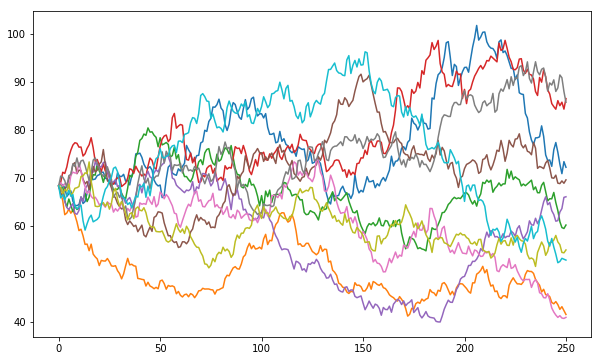

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

******

Use numpy.maximum to create a vector with as many elements as there are columns in the S matrix.

#### Here set the Strike Price K as $ 100.0

In [18]:
p = np.maximum(S[-1] - 100, 0)

In [19]:
p

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [20]:
p.shape

(10000,)

Use the following formula to forecast the price of a stock option.

$$
C = \frac{exp(-r \cdot T) \cdot \sum{p_i}}{iterations}
$$

In [21]:
C = np.exp(-r * T) * np.sum(p) / iterations
C 

1.5223117792650467

Because this pricing model is based on random iterations, you will obtain a different result every time you re-run the code in this document. Expand the “Kernel” list from the Jupyter menu and click on “Restart and run all”/”Restart & run all cells” to verify this is true.